<a href="https://colab.research.google.com/github/Devika0910/Cat-and-Dog-image-detection-CNN/blob/main/cat_and_dog_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen=ImageDataGenerator(rescale = 1./255,
                                 shear_range  = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

In [4]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/c vs D",
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode='binary'
                                               )

Found 4280 images belonging to 4 classes.


In [5]:
# load a test image for visualization purposes
test_image = np.random.rand(150,150,3)

In [6]:
# choose an image from the training set
img_path = "/content/drive/MyDrive/c vs D/testing/dog/dog.4761.jpg"

(1, 150, 150, 3)


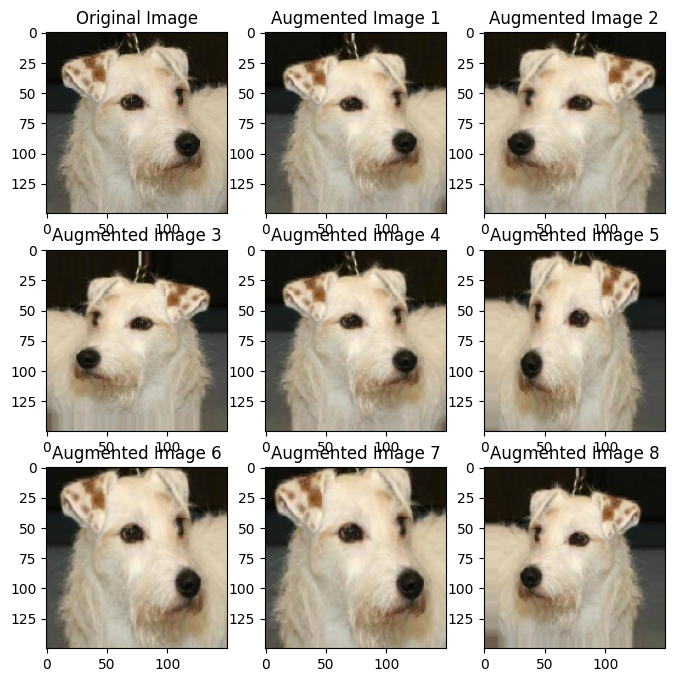

In [7]:
# load and display the original image
img= image.load_img(img_path,target_size=(150,150))
plt.figure(figsize=(8,8))
plt.subplot(3,3,1)
plt.imshow(img)
plt.title('Original Image')
img=image.img_to_array(img)
img=img.reshape((1,) + img.shape)
print(img.shape)

# Generate augmented image and display them

i = 2
for batch in train_datagen.flow(img, batch_size=1):
    plt.subplot(3, 3, i)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title('Augmented Image {}'.format(i-1))
    i += 1
    if i > 9:
        break  # Break after displaying 8 augmented images

plt.show()

In [8]:
test_datagen= ImageDataGenerator(rescale = 1./255)
test_set=test_datagen.flow_from_directory(directory="/content/drive/MyDrive/c vs D/testing",
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode = "binary")

Found 1690 images belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [10]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # for colored Images and 1 for Grayscale Images
BATCH_SIZE=32
EPOCHS=5

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),name='Conv1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool1'))


model.add(Conv2D(64, (3, 3), activation='relu', name='Conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool2'))

model.add(Conv2D(64, (3, 3), activation='relu', name='Conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool3'))

model.add(Conv2D(64, (3, 3), activation='relu', name='Conv4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool4'))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten is used to convert the multi dimensional output from the previous layer into a one dimensional array
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

In [12]:
optimizer = Adam(0.001)

In [13]:
model.compile(loss='binary_crossentropy',)

In [14]:
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 64)        0

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [16]:
earlystop=EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.00001)
callbacks=[earlystop,learning_rate_reduction]

In [17]:
%%time
# running time
hist=model.fit(training_set,
               epochs=EPOCHS,
               validation_data=test_set,
               callbacks=callbacks
)

Epoch 1/5
134/134 [==============================] - 1766s 13s/step - loss: -2.6553 - accuracy: 0.1867 - val_loss: 29.9007 - val_accuracy: 0.1882 - lr: 0.0010
Epoch 2/5
134/134 [==============================] - 317s 2s/step - loss: -26.5603 - accuracy: 0.2364 - val_loss: 147.4701 - val_accuracy: 0.1905 - lr: 0.0010
Epoch 3/5
134/134 [==============================] - 332s 2s/step - loss: -102.2333 - accuracy: 0.2404 - val_loss: 368.1877 - val_accuracy: 0.2266 - lr: 0.0010
Epoch 4/5
134/134 [==============================] - 322s 2s/step - loss: -242.9468 - accuracy: 0.2423 - val_loss: 1151.3800 - val_accuracy: 0.1882 - lr: 0.0010
Epoch 5/5
134/134 [==============================] - ETA: 0s - loss: -445.3777 - accuracy: 0.2411
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
134/134 [==============================] - 325s 2s/step - loss: -445.3777 - accuracy: 0.2411 - val_loss: 563.5006 - val_accuracy: 0.1882 - lr: 0.0010
CPU times: user 35min 56s, sys: 5min

In [18]:
model.save('my_model.keras')

In [19]:
results=model.evaluate(test_set)

53/53 [==============================] - 33s 616ms/step - loss: 563.5008 - accuracy: 0.1882


In [20]:
print("loss:",results[0])
print("Accuracy:",results[1])

loss: 563.5007934570312
Accuracy: 0.18816567957401276


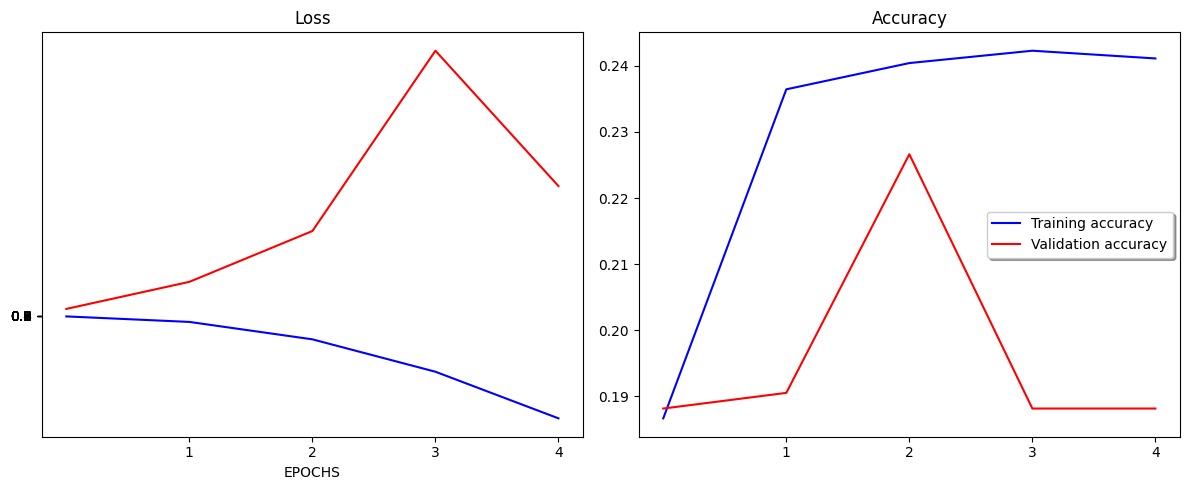

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("EPOCHS")
ax1.set_title("Loss")

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_xlabel("EPOCHS")
ax2.set_title("Accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

/bin/bash: line 1: conda: command not found


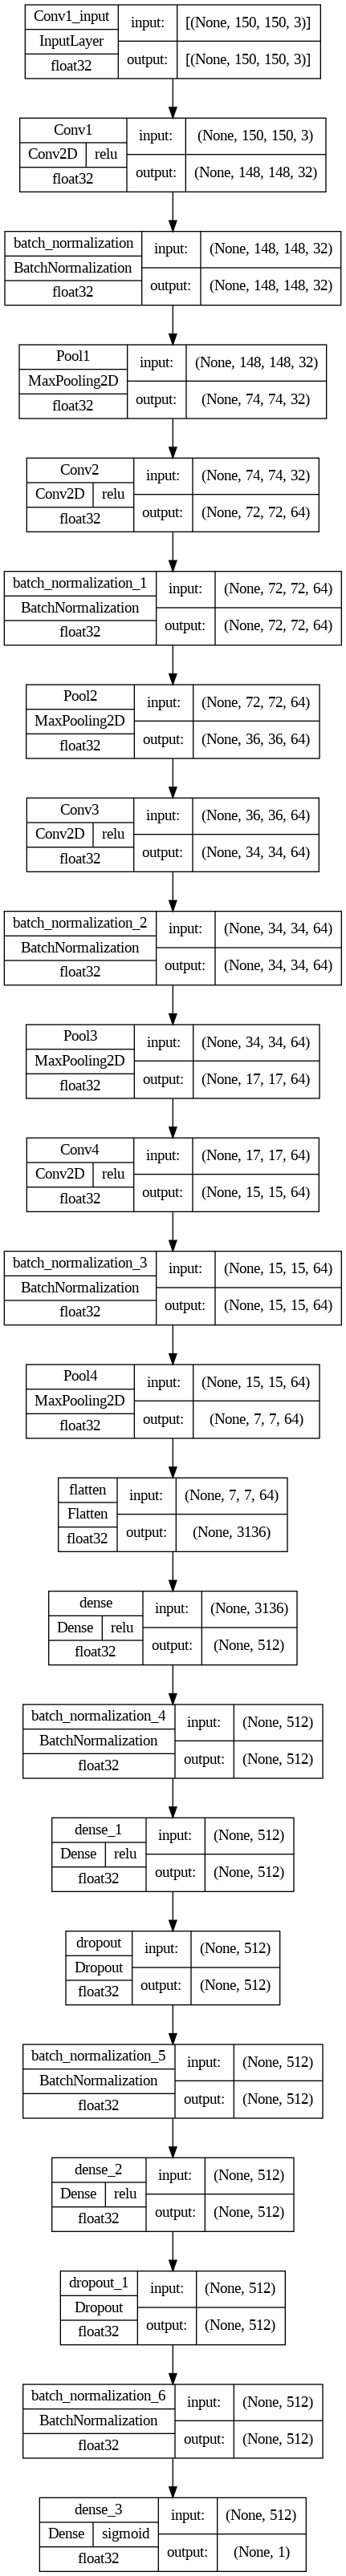

In [22]:
!pip3 install pydot
!pip3 install graphviz
!conda install graphviz
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [23]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
test_image = load_img('/content/drive/MyDrive/c vs D/testing/dog/dog.4764.jpg',target_size=(150,150))
cnn_model=load_model('my_model.keras')

In [24]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 290ms/step
dog
